# Predicting Car Prices

*This project is guided by DataQuest.*

## Introduction

In this project, we are going to predict a car's market price using its attributes. 

## Data Exploration

In [3]:
import pandas as pd
import numpy as np

In [4]:
## Import the dataset
cols = ["symboling", "normalized_losses", "make",
       "fuel_type", "aspiration", "num_doors",
       "body_style", "drive_wheels", "engine_location",
       "wheel_base", "length", "width",
       "height", "curb_weight", "engine_type",
       "num_cylinders", "engine_size", "fuel_system",
       "bore", "stroke", "compression_ratio",
       "horsepower", "peak_rpm", "city_mpg",
       "highway_mpg", "price"]
cars = pd.read_csv("imports-85.data", names = cols)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [6]:
# Select only the columns with continous values 
continous_values_cols = ["normalized_losses", "wheel_base", "length",
                        "width", "height", "curb_weight",
                        "engine_size", "bore", "stroke",
                        "compression_ratio", "horsepower", "peak_rpm",
                        "city_mpg", "highway_mpg", "price"]
numeric_cars = cars[continous_values_cols]
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

In [7]:
## Replace all of the ? values with the numpy.nan missing value
numeric_cars = numeric_cars.replace("?", np.nan)
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
# Convert columns type to float and get the missing values info
numeric_cars = numeric_cars.astype("float")
numeric_cars.isna().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [9]:
# As price is what we want to predict, remove rows with a missing price
numeric_cars = numeric_cars.dropna(subset = ['price'])
numeric_cars.isna().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [10]:
# Replace missing values in columns with the mean value
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

# Check the missing values
numeric_cars.isna().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [13]:
# Normalize the numeric ones so all values range from 0 to 1, except column `price`
price_col = numeric_cars['price'] 
numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the function
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide rows into two datasets
    last_train_row = int(len(rand_df) / 2)
    
    # Split the original dataset 
    train_df = rand_df.iloc[:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a knn model with the default k value
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions with the model
    predictions = knn.predict(test_df[[train_col]])
    
    # Calculate mse and rmse
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [15]:
rmse_results = dict()
train_cols = numeric_cars.columns.drop("price")

# For each column(except price), train a model and return rmse
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

In [20]:
# Output the results
pd.Series(rmse_results).sort_values()

engine_size          3238.462830
horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

**From the above results, we can see that `engine_size` performs the best using the default k value.**

In [23]:
# Modify the knn_train_test() function 
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide rows into two datasets
    last_train_row = int(len(rand_df) / 2)
    
    # Split the original dataset 
    train_df = rand_df.iloc[:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a knn model with the different k values
    k_values = [1, 3, 5, 7, 9]
    k_rmses = dict()
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        predicted_labels = knn.predict(test_df[[train_col]])
        
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

In [24]:
k_rmse_results = dict()
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val
    
k_rmse_results

{'normalized_losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel_base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine_size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


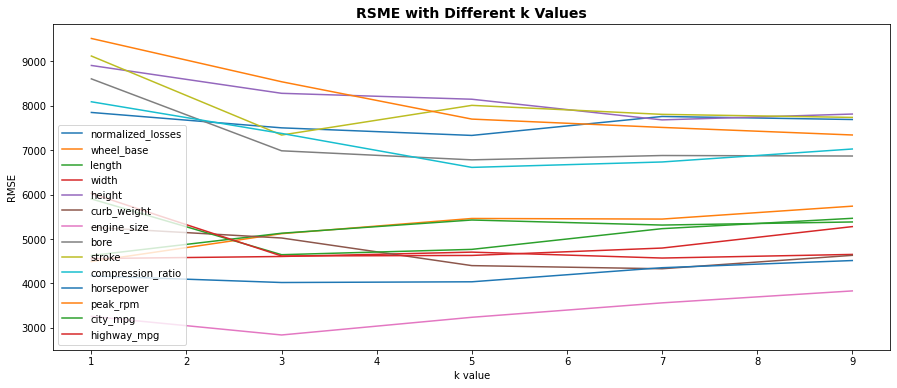

In [42]:
# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (15, 6))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel("k value")
    plt.ylabel("RMSE")

plt.legend(k_rmse_results.keys())
plt.title("RSME with Different k Values", fontsize = 14, weight = 'bold')   
plt.show()


## Multivariate Model

In [44]:
# Calculate average RMSE across different k values for each feature
feature_mean_rmse = dict()
for k,v in k_rmse_results.items():
    mean_rmse = np.mean(list(v.values()))
    feature_mean_rmse[k] = mean_rmse
    
sorted_series_avg_rmse = pd.Series(feature_mean_rmse).sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index
print(sorted_features)

engine_size          3346.484586
horsepower           4219.377860
width                4618.910560
curb_weight          4730.075815
highway_mpg          5069.469256
length               5176.394904
city_mpg             5202.409003
wheel_base           5252.392462
compression_ratio    7166.073599
bore                 7222.472445
normalized_losses    7624.407151
stroke               8000.240467
peak_rpm             8119.365233
height               8163.346266
dtype: float64
Index(['engine_size', 'horsepower', 'width', 'curb_weight', 'highway_mpg',
       'length', 'city_mpg', 'wheel_base', 'compression_ratio', 'bore',
       'normalized_losses', 'stroke', 'peak_rpm', 'height'],
      dtype='object')


In [51]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805},
 '6 best features': {5: 3478.510890118539}}

## Hyperparameter Tuning

In [52]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388.22571

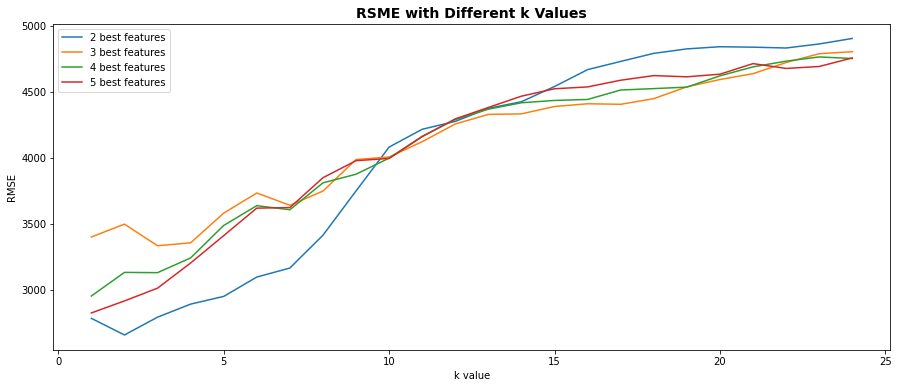

In [54]:
# Visualization
plt.figure(figsize = (15, 6))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()
plt.title("RSME with Different k Values", fontsize = 14, weight = 'bold')   
plt.show()
